In [1]:
import pandas as pd
from pathlib import Path

In [2]:
ruta_base = Path.cwd()
ruta_base = ruta_base.parents[1]

In [3]:
ruta_bd = ruta_base / 'Ejercicio2' / 'data' / 'raw' / 'bd.xlsx'
categorias_raw = pd.read_excel(ruta_bd, sheet_name='CATEGORIAS_CONSUMO')

In [4]:
categorias_raw.head()

,CODIGO_CATEGORIA,NOMBRE_CATEGORIA,CIUDAD,DEPARTAMENTO
0,1,Electrónica,Bogotá,Distrito Capital
1,2,Ropa,Bogotá,Distrito Capital
2,3,Alimentos,Bogotá,Distrito Capital
3,4,Juguetes,Bogotá,Distrito Capital
4,5,Muebles,Bogotá,Distrito Capital


Analisis exploratorio de datos

In [9]:
categorias_raw['CODIGO_CATEGORIA'].duplicated().any()


np.False_

<Axes: ylabel='NOMBRE_CATEGORIA'>

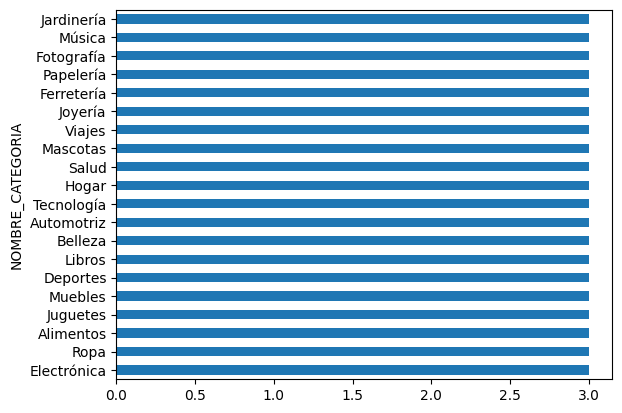

In [5]:
categorias_raw['NOMBRE_CATEGORIA'].value_counts().plot(kind='barh')


<Axes: ylabel='CIUDAD'>

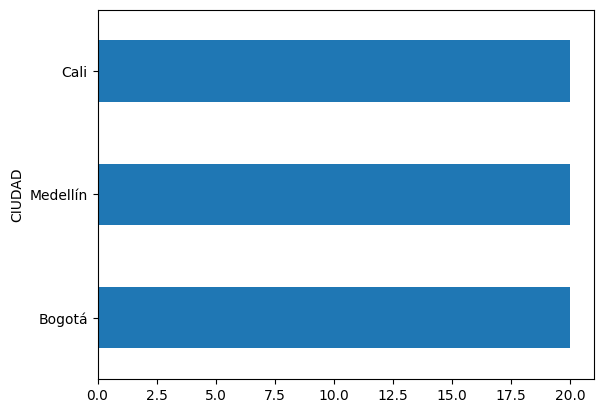

In [6]:
categorias_raw['CIUDAD'].value_counts().plot(kind='barh')

<Axes: ylabel='DEPARTAMENTO'>

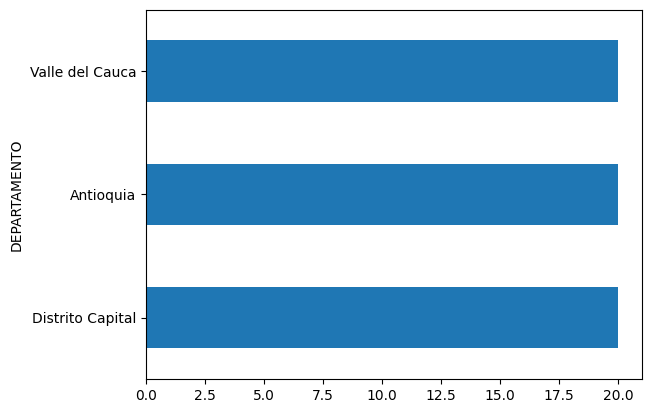

In [7]:
categorias_raw['DEPARTAMENTO'].value_counts().plot(kind='barh')

Creacion de dimensiones

In [10]:
df_departamento = pd.DataFrame({
    "id": range(1, categorias_raw["DEPARTAMENTO"].nunique() + 1),
    "departamento": categorias_raw["DEPARTAMENTO"].drop_duplicates().values
})

In [11]:
df_ciudad = pd.DataFrame({
    "id": range(1, categorias_raw["CIUDAD"].nunique() + 1),
    "ciudad": categorias_raw["CIUDAD"].drop_duplicates().values
})

Mapeo de id's de las dimensiones a la tabla categorias consumo

In [12]:
categorias = categorias_raw.copy()

categorias = categorias.merge(df_ciudad[["ciudad", "id"]], left_on="CIUDAD", right_on="ciudad", how="left") \
                   .rename(columns={"id": "id_ciudad"}) \
                   .drop(columns=["ciudad","CIUDAD"]) 

categorias = categorias.merge(df_departamento[["departamento", "id"]], left_on="DEPARTAMENTO", right_on="departamento", how="left") \
                   .rename(columns={"id": "id_departamento"}) \
                   .drop(columns=["departamento", "DEPARTAMENTO"]) 


In [13]:
categorias.head()

,CODIGO_CATEGORIA,NOMBRE_CATEGORIA,id_ciudad,id_departamento
0,1,Electrónica,1,1
1,2,Ropa,1,1
2,3,Alimentos,1,1
3,4,Juguetes,1,1
4,5,Muebles,1,1


Guardar datos procesados como csv

In [14]:
carpeta_destino = ruta_base / 'Ejercicio2' / 'data' / 'processed'

categorias.to_csv(carpeta_destino / 'categorias.csv', index=False)
df_ciudad.to_csv(carpeta_destino / 'ciudad.csv', index=False)
df_departamento.to_csv(carpeta_destino / 'departamento.csv', index=False)